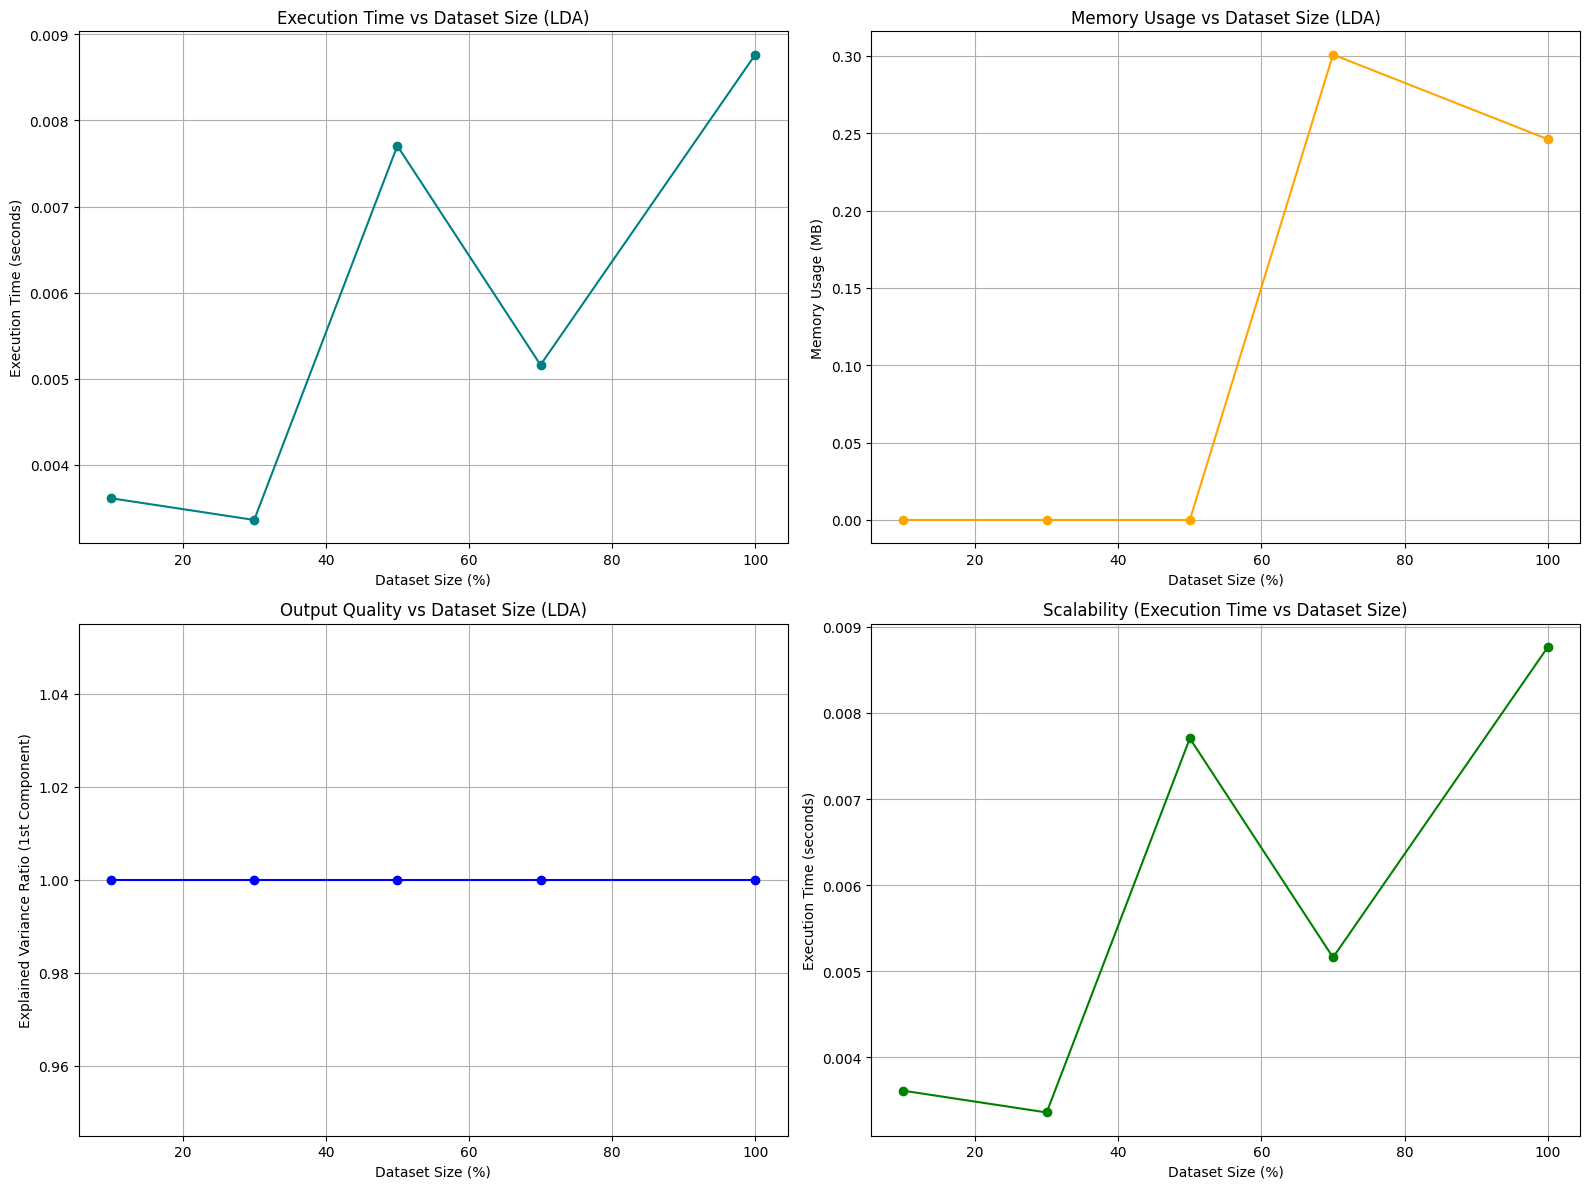

Execution Times: [0.003613710403442383, 0.0033614635467529297, 0.007704019546508789, 0.0051610469818115234, 0.008763551712036133]
Memory Usages: [0.0, 0.0, 0.0, 0.30078125, 0.24609375]
Output Quality (Explained Variance for 1st Component): [np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0)]


In [5]:
import matplotlib.pyplot as plt
import time
import psutil
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

# Step 1: Load and Clean the Dataset
file_path =  r"C:\Users\Shafiya mariyam\Downloads\tourism_dataset.csv"   # Update with the correct path
dataset = pd.read_csv(file_path)

dataset_cleaned = dataset.drop(columns=["Unnamed: 6"], errors="ignore")
dataset_cleaned = dataset_cleaned.dropna()

# Encode categorical columns
label_encoder = LabelEncoder()
categorical_columns = ["Location", "Country", "Category"]
for col in categorical_columns:
    dataset_cleaned[col] = label_encoder.fit_transform(dataset_cleaned[col])

# Convert Revenue column to numeric
dataset_cleaned["Revenue"] = pd.to_numeric(dataset_cleaned["Revenue"], errors="coerce")
dataset_cleaned = dataset_cleaned.dropna()

# Normalize the data
features = ["Location", "Country", "Category", "Visitors", "Rating", "Revenue"]
scaler = StandardScaler()
normalized_data = scaler.fit_transform(dataset_cleaned[features])
labels = dataset_cleaned["Category"]  # Target variable for LDA

# Step 2: Parameters for Subset Sizes
subset_sizes = [0.1, 0.3, 0.5, 0.7, 1.0]  # Fractions of the dataset size
execution_times = []
memory_usages = []
output_quality = []

# Step 3: Apply Algorithm and Measure Metrics
for fraction in subset_sizes:
    subset_size = int(len(normalized_data) * fraction)
    subset_data = normalized_data[:subset_size]
    subset_labels = labels[:subset_size]

    # Measure Execution Time
    start_time = time.time()
    lda = LDA(n_components=1)
    
    # Measure Memory Usage before fitting the model
    process = psutil.Process()
    mem_before = process.memory_info().rss / 1024 ** 2  # Memory before fitting, in MB
    
    lda_result = lda.fit_transform(subset_data, subset_labels)
    
    # Measure Memory Usage after fitting the model
    mem_after = process.memory_info().rss / 1024 ** 2  # Memory after fitting, in MB
    memory_usage = mem_after - mem_before  # Calculate the memory usage change
    memory_usages.append(memory_usage)

    execution_time = time.time() - start_time
    execution_times.append(execution_time)

    # Measure Output Quality
    explained_variance = lda.explained_variance_ratio_[0]  # Take the first component
    output_quality.append(explained_variance)

# Ensure that the lists match in length with subset_sizes
assert len(execution_times) == len(subset_sizes), f"Length mismatch: execution_times = {len(execution_times)}, subset_sizes = {len(subset_sizes)}"
assert len(memory_usages) == len(subset_sizes), f"Length mismatch: memory_usages = {len(memory_usages)}, subset_sizes = {len(subset_sizes)}"
assert len(output_quality) == len(subset_sizes), f"Length mismatch: output_quality = {len(output_quality)}, subset_sizes = {len(subset_sizes)}"

# Step 4: Plot Scalability and Metrics Graphs
plt.figure(figsize=(16, 12))

# Graph 1: Execution Time vs Dataset Size
plt.subplot(2, 2, 1)
plt.plot([int(s * 100) for s in subset_sizes], execution_times, marker="o", color="teal")
plt.title("Execution Time vs Dataset Size (LDA)")
plt.xlabel("Dataset Size (%)")
plt.ylabel("Execution Time (seconds)")
plt.grid()

# Graph 2: Memory Usage vs Dataset Size
plt.subplot(2, 2, 2)
plt.plot([int(s * 100) for s in subset_sizes], memory_usages, marker="o", color="orange")
plt.title("Memory Usage vs Dataset Size (LDA)")
plt.xlabel("Dataset Size (%)")
plt.ylabel("Memory Usage (MB)")
plt.grid()

# Graph 3: Output Quality vs Dataset Size
plt.subplot(2, 2, 3)
plt.plot([int(s * 100) for s in subset_sizes], output_quality, marker="o", color="blue")
plt.title("Output Quality vs Dataset Size (LDA)")
plt.xlabel("Dataset Size (%)")
plt.ylabel("Explained Variance Ratio (1st Component)")
plt.grid()

# Graph 4: Scalability (Execution Time vs Dataset Size)
plt.subplot(2, 2, 4)
plt.plot([int(s * 100) for s in subset_sizes], execution_times, marker="o", color="green")
plt.title("Scalability (Execution Time vs Dataset Size)")
plt.xlabel("Dataset Size (%)")
plt.ylabel("Execution Time (seconds)")
plt.grid()

plt.tight_layout()
plt.show()

# Step 5: Print the Metrics
print(f"Execution Times: {execution_times}")
print(f"Memory Usages: {memory_usages}")
print(f"Output Quality (Explained Variance for 1st Component): {output_quality}")


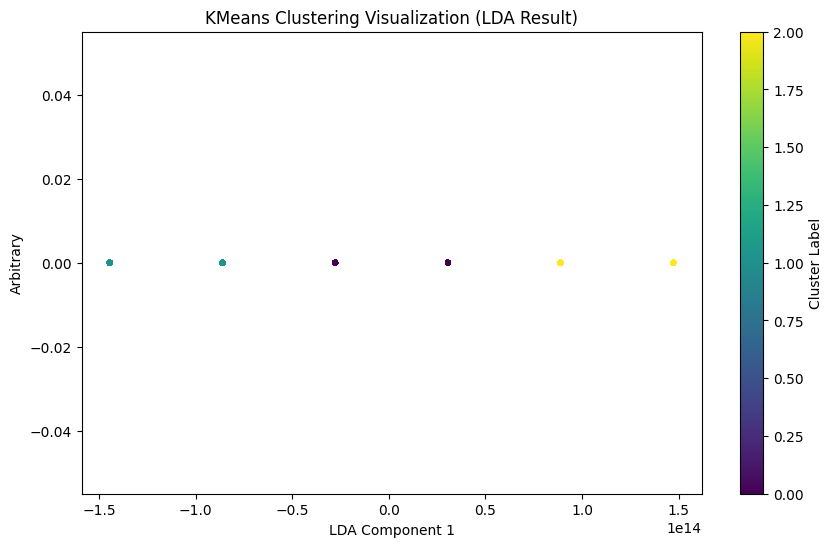

In [6]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(lda_result)
plt.figure(figsize=(10, 6))
plt.scatter(lda_result[:, 0], np.zeros_like(lda_result[:, 0]), c=labels, cmap="viridis", s=10)
plt.title("KMeans Clustering Visualization (LDA Result)")
plt.xlabel("LDA Component 1")
plt.ylabel("Arbitrary")
plt.colorbar(label="Cluster Label")
plt.show()